In [1]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn 
# !pip install matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comments = pd.read_csv('UScomments.csv',on_bad_lines='skip',low_memory=False)

In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
## missing data
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
## drop missing values 
comments.dropna(inplace=True)

In [6]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## 1. Performing Sentiment Analysis using TextBlob, NLTK Vader and Spacy
    
    

In [7]:
### lets perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK )..

In [8]:
# !pip install textblob
from textblob import TextBlob

In [9]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity 

0.0

In [10]:
#df = comments[0:1000]

In [11]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
print(polarity[0:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573, 0.0, 0.2, -0.023333333333333352, 0.5, 0.0, 0.8, -0.2916666666666667, 0.0, 0.25, -0.8, 0.0, 0.0, 0.65, 0.0, 0.375, 0.0, 0.0, 0.5, -0.04999999999999999, 0.34448051948051944, 0.5, 0.6, 0.0, 0.0, -0.30625, 0.28828125, -0.36458333333333337, 0.5, 0.012499999999999997, 0.11904761904761905, 0.16666666666666666, 0.0, -0.4, -0.125, -0.07142857142857142, 0.40727272727272723, 0.0, 0.35, 0.0, -0.03415584415584416]


In [13]:
comments.shape

(691375, 4)

In [14]:
comments.head(3)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0


In [15]:
#Adding polarity column in comments dataframe 
comments['polarity'] = polarity

In [16]:
comments.head(12)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [17]:
# Using NLTK

import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia= SentimentIntensityAnalyzer()
vader_polarity = []
for comment in comments['comment_text']:
    vader_polarity.append(sia.polarity_scores(comment)['compound'])

In [18]:
comments['vader_polarity'] = vader_polarity

print(comments.head())

      video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  vader_polarity  
0       0       0.0          0.0000  
1       0       0.0          0.0000  
2       0       0.0          0.0000  
3       0       0.0          0.4648  
4       0       0.0          0.0000  


In [19]:
# Using Spacy 
# !pip instal spacy
# !pip install spacytextblobl

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

spacy_polarity = [] 

for comment in comments['comment_text']:
    temp = nlp(comment)
    spacy_polarity.append(temp._.blob.polarity)

KeyboardInterrupt: 

In [20]:
comments['spacy_polarity'] = spacy_polarity

print(comments.head())

ValueError: Length of values (29785) does not match length of index (691375)

WORD CLOUD ANALYSIS

In [21]:
### Lets perform Exploratory data analysis for negative sentences

In [22]:
# Separating out comments into positive and negative based on TextBlob's polarity 

comments_positive = comments[comments['polarity']==1]

In [23]:
comments_negative=comments[comments['polarity']==-1]

In [24]:
comments_positive.head(2)

,video_id,comment_text,likes,replies,polarity,vader_polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0,0.6369
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0,0.8910


In [25]:
# !pip install wordcloud

In [26]:
from wordcloud import WordCloud , STOPWORDS

In [27]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [28]:
# Creating a continuous paragraph of all comments

total_comments=' '.join(comments_negative['comment_text'])

In [29]:
# total_comments[0:100]

(-0.5, 399.5, 199.5, -0.5)

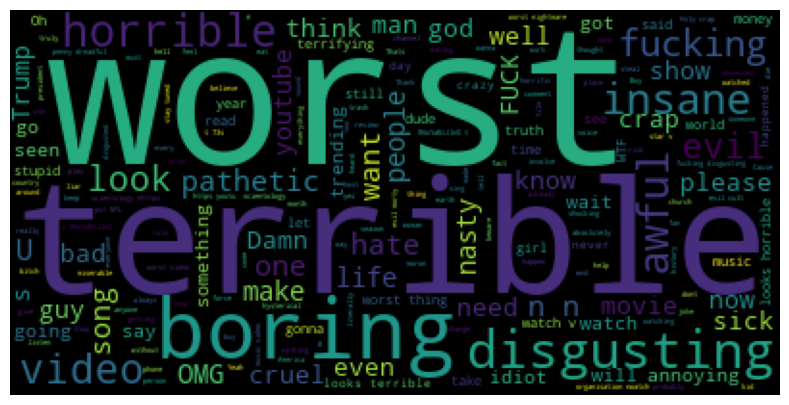

In [30]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [31]:
### Conclusion-->> Users are emphasizing more on words like Terrible,worst,boring,disgusting,insane etc.. 

### Try it : 
    a..Extract positive comments using query() function of pandas..
    b..Extract positive comments using where() function of numpy

In [32]:
pos_comments = comments.query('polarity == 1')['comment_text']
# pos_comments.head()
all_pos_comments = ' '.join(pos_comments)
print(all_pos_comments[:100])

yu are the best Power is the disease.  Care is the cure.  Keep caring for yourself and others as bes


In [33]:
# comments.where(polarity==1)

In [34]:
### Word cloud for the Positive sentences

In [35]:
total_comments2=' '.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

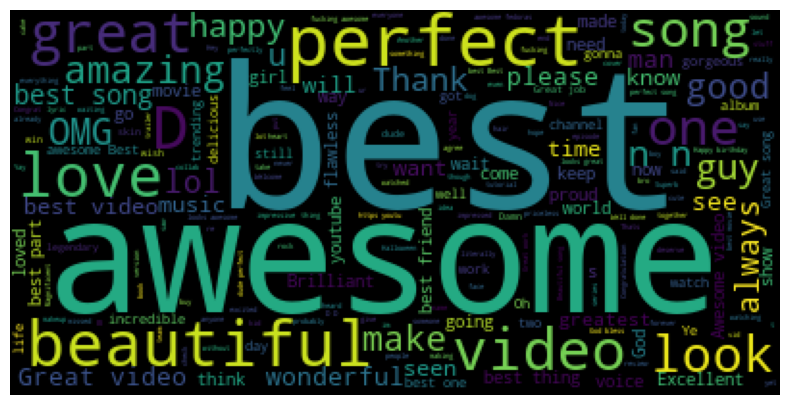

In [36]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [37]:
# !pip install emoji

In [38]:
import emoji

In [39]:
comments.head(14)

,video_id,comment_text,likes,replies,polarity,vader_polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000,0.0000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000,0.0000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000,0.0000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000,0.0000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000,0.5719
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714,-0.7717


In [40]:
print('\U0001F600')  # Unicode of emoji

😀


In [41]:
### lets extract emoji from below comment

In [42]:
comment='trending 😉'

In [43]:
comment

'trending 😉'

In [44]:
[c for c in comment if c in emoji.EMOJI_DATA]

['😉']

In [45]:
emoji_list=[]
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [46]:
len(emoji_list)

294549

In [47]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [48]:
### NOw we have to compute frequencies of each & every emojis..

In [49]:
from collections import Counter

In [50]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [51]:
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [52]:
Counter(emoji_list).most_common(10)[1][0]

'😍'

In [53]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [54]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [55]:
freqs=[Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [56]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [57]:
# !pip install plotly

In [58]:
import plotly.graph_objs as go

In [59]:
from plotly.offline import iplot

In [60]:
trace=go.Bar(x=emojis,y=freqs)

In [61]:
# !pip install nbformat
iplot([trace])

### Try it :
    Once u have list of emojis , how to create a dictionary like : {'emoji':'frequency of emoji'}
        
    1..code completely from scratch..
       (by iterating over the list and counting frequency)

    2..using list in-built count function
    3..using dictionary in-buult get function

***Creating a Dictionary like {'emoji' : frequency} using 3 ways***

1. Naive approach - Iterating over the list and counting the frequency

In [62]:
emoji_count = {}
for emoji in emoji_list:
    if emoji in emoji_count:
        emoji_count[emoji] = emoji_count[emoji] + 1
    else:
        emoji_count[emoji] = 1
        
emoji_count['\U0001F600']

1734

2. Using List's in-built count function

In [63]:
emoji_count = {emoji:emoji_list.count(emoji) for emoji in set(emoji_list)}
emoji_count['\U0001F600']

1734

3. Using dictionary's in-built get function

In [64]:
emoji_count = {}
for emoji in emoji_list:
    emoji_count[emoji] = emoji_count.get(emoji, 0) + 1

emoji_count['\U0001F600']

1734

## 4..Collect Entire data of Youtube !

In [65]:
import os

In [66]:
csv_path=r'/Users/divya/Desktop/LinkedIn Learning Courses/Data Analysis Projects/Youtube Text analysis/Youtube_project_shan_singh/additional_data/CSV files'

In [67]:
files=os.listdir(csv_path)
files

['MXvideos.csv',
 '.DS_Store',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [68]:
# for i in range(1,len(files),2):
#     print(i)

In [69]:
files_csv=[files[i] for i in range(0,len(files))]

In [70]:
files_csv

['MXvideos.csv',
 '.DS_Store',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [71]:
files_csv[0].split('.')[0][0:2]

'MX'

In [79]:
full_df=pd.DataFrame()

for file in files_csv:
    current_df=pd.read_csv(csv_path+'/'+file,encoding='iso-8859-1',on_bad_lines='skip')
    
    current_df['country']=file.split('.')[0][0:2] #extracting country code from file name
    full_df=pd.concat([full_df,current_df])
    
# print(full_df[0:10])
# an unnecessary column named unnamed0 (due to encoding or OS) was getting included in the full_df, so dropped it.
full_df.drop(['Unnamed: 0'], axis=1) 
print(full_df[0:10])

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,1836.0,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972.0,271.0,174.0,369.0,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,607.0,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378.0,171.0,208.0,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,MX
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781.0,681.0,7428.0,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,MX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10.0,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952.0,268088.0,12783.0,9933.0,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,GB
38912,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10.0,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219.0,61998.0,13781.0,24330.0,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,GB
38913,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10.0,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412.0,394830.0,8892.0,19988.0,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE â¶ http://ad.gt/2...,GB
38914,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24.0,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515.0,151870.0,45875.0,26766.0,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,GB


,{,country,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
"""kind"": ""youtube#videoCategoryListResponse""",NaN,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""etag"": ""\""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk\""""",NaN,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""items"": [",NaN,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
{,NaN,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(138663, 18)

## 5.. Which Category has the maximum likes ?

In [ ]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [ ]:
cat=pd.read_csv('F:\Data Analysis_projects\Youtube/category_file.txt',sep=':')

In [ ]:
cat.reset_index(inplace=True)

In [ ]:
cat.columns=['category_id','Category_name']

In [ ]:
cat.set_index('category_id',inplace=True)

In [ ]:
cat

,Category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [ ]:
dct=cat.to_dict()

In [ ]:
dct['Category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [ ]:
full_df['category_name']=full_df['category_id'].map(dct['Category_name'])

In [ ]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [81]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Unnamed: 0
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,1836.0,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX,NaN
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972.0,271.0,174.0,369.0,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX,NaN
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,607.0,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

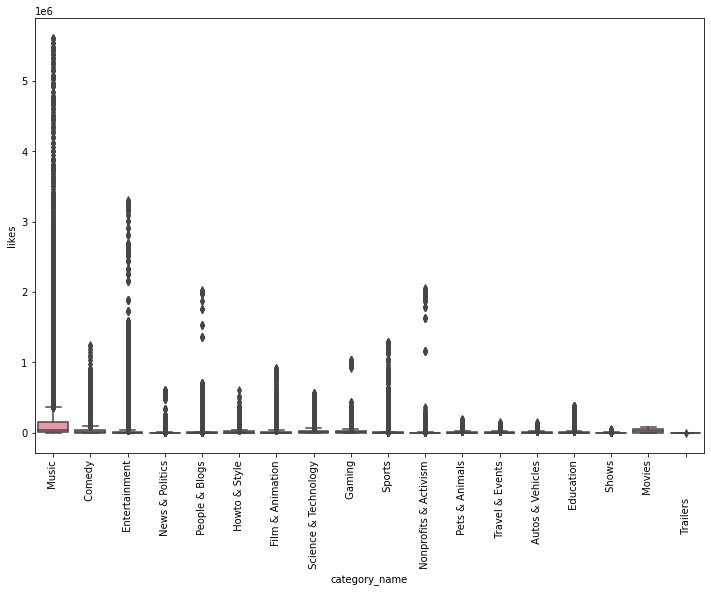

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')

### Try it :
    a)How to extract category from json file ( US_category_id.json)

In [96]:
import json 

f = open(r'/Users/divya/Desktop/LinkedIn Learning Courses/Data Analysis Projects/Youtube Text analysis/Youtube_project_shan_singh/additional_data/JSON files/US_category_id.json')
data = json.load(f)
categories = dict()

for category in data['items']:
    categories[int(category['id'])] = category['snippet']['title']
    # print(type(category['id']))
    # print(category['snippet']['title'])

categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

## 6.. Find out whether audience is engaged or not

In [ ]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [ ]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [ ]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

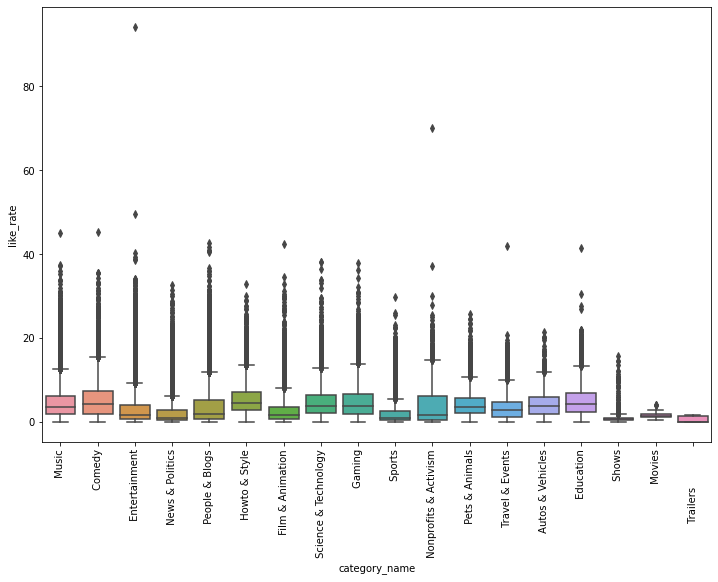

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')

In [ ]:
### analysing relationship between views & likes

<AxesSubplot:xlabel='views', ylabel='likes'>

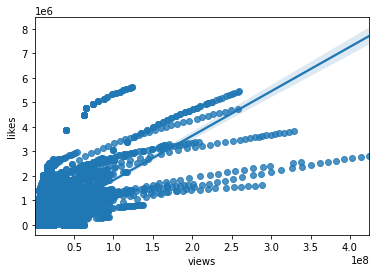

In [ ]:
sns.regplot(data=full_df,x='views',y='likes')

In [ ]:
### finding co-relation values between ['views', 'likes', 'dislikes']

<AxesSubplot:>

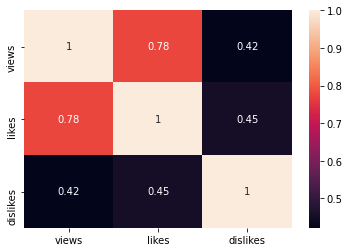

In [ ]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)

Create scatterplot between 'views' & 'likes'

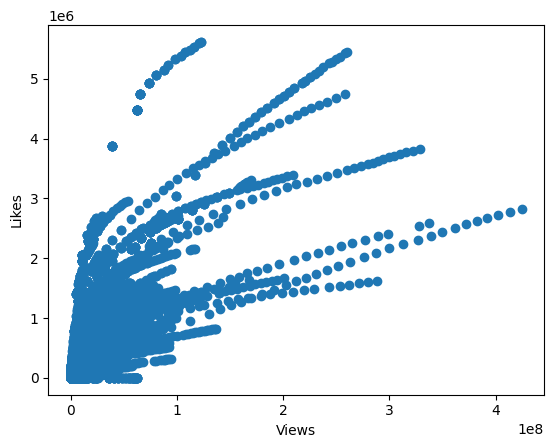

In [98]:
plt.scatter(full_df['views'], full_df['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')

plt.show()

## 7..Which channels have the largest number of trending videos?

In [99]:
total_vids = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})
total_vids.head()

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743


In [ ]:
import plotly.express as px
px.bar(data_frame=total_vids[0:20],x='channel_title',y='total_videos')

Create Above Bar graph using 
1. Pandas

2. Matplotlib 

3. Bokeh

4. Seaborn

## 8..Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [105]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [106]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

full_df['title'][0]

0                       CapÃ­tulo 12 | MasterChef 2017
0                                                  NaN
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0             Malika LePen : Femme de Gauche - Trailer
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
0        John Lewis Christmas Ad 2017 - #MozTheMonster
Name: title, dtype: object

In [107]:
text='Eminem - Walk On Water (Audio) ft. BeyoncÃ©'
punc_count(text)

4

In [108]:
sample=full_df[0:10000]

In [109]:
sample['count_punc']=sample['title'].apply(punc_count)

/var/folders/_8/8fddqwdn74d_7gg6vgmjw91h0000gn/T/ipykernel_55029/1342546377.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
sample.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Unnamed: 0,count_punc
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,1836.0,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX,NaN,1
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972.0,271.0,174.0,369.0,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX,NaN,3
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,607.0,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX,NaN,1
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378.0,171.0,208.0,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,MX,NaN,1
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781.0,681.0,7428.0,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,MX,NaN,1


<Axes: xlabel='count_punc', ylabel='views'>

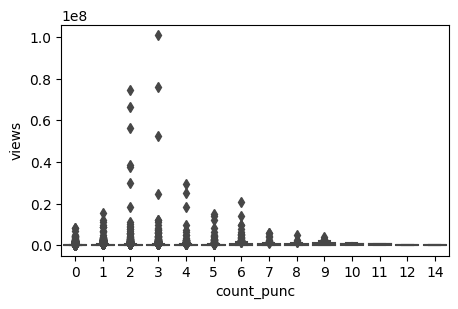

In [118]:
plt.figure(figsize=(5,3))
sns.boxplot(x='count_punc',y='views',data=sample)

In [119]:
sample['count_punc'].corr(sample['views']) # not much coorelated - only 7% probability of higher views with more punctuation in video title 

0.06220850451653466

How to remove punctuation from data using Regular Expressions

In [129]:
import re 

temp = []

for title in sample['title']:
    temp.append(re.sub('[^a-zA-Z0-9]',' ',title))
                                    
sample['removed_punc'] = temp
sample[['title','removed_punc']].head()

/var/folders/_8/8fddqwdn74d_7gg6vgmjw91h0000gn/T/ipykernel_55029/1298838756.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,removed_punc
0,CapÃ­tulo 12 | MasterChef 2017,Cap tulo 12 MasterChef 2017
1,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,ALEXA EX INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,LOUIS CKAG EL PULSO DE LA REP BLICA
3,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Sismo de 6 7 sacude Costa Rica 12 Noviembre 2017
4,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,DOG HACKS MUSAS LESSLIE LOS POLINESIOS
